<a href="https://colab.research.google.com/github/ConstantinCed/github1s/blob/master/Assignement_1_121c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.1 DE**

Dense Matrix

Hamiltonian computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
def ising_hamiltonian(L,h,periodic):
  H=np.zeros((2**L,2**L))
  for b in range(2**L):
    for j in range(1,L+1):
      a=b^(1<<j-1)
      H[a,b]=-h
  for a in range(2**L):
    for j in range(1,L):
      if a&(1<<j)==(a&(1<<j-1))*2:
        H[a,a]-=1
      else:
        H[a,a]+=1

    if periodic:
        if (a & (1 << L-1)) == ((a & (1 << 0))*(2**(L-1))) :
          H[a, a]-=1
        else:
          H[a, a]+=1
  return H

Plot of ground state energies for range of h

In [ ]:
L_values = [8,10,12,14]
ground_state_energies = {L: [] for L in L_values}

def calculate_h_values(L):

    if L==8:
        return 50
    if L==10:
        return 25
    if L==12:
        return 20
    if L==14:
        return 15
    else:
        return 20


for L in L_values:
    h_values = np.linspace(0, 2, calculate_h_values(L))
    for h in tqdm(h_values, desc=f'Calculating for L={L}'):
        H = ising_hamiltonian(L, h, True)
        ground_state = scipy.linalg.eigh(H, subset_by_index=(0, 0), eigvals_only=True)
        ground_state_energies[L].append(ground_state)

**4.2 Sparse matrix computation**

In [14]:
from scipy.sparse import csr_matrix
def ising_sparse(L,h,periodic):
  rows = []
  cols = []
  matrix_elements = []
  for b in range(2**L):
    for j in range(1, L + 1):
      a = b ^ (1 << (j - 1))
      rows.append(a)
      cols.append(b)
      matrix_elements.append(-h)

  for a in range(2**L):
    diagonal_value =0
    for j in range(1, L):
        if a & (1 << j) == (a & (1 << (j - 1))) * 2:
            diagonal_value -= 1
        else:
            diagonal_value += 1

    if periodic:
        if (a & (1 << (L - 1))) == ((a & 1) * (2 ** (L - 1))):
            diagonal_value -= 1
        else:
            diagonal_value += 1
        rows.append(a)
        cols.append(a)
        matrix_elements.append(diagonal_value)
  H_sparse = csr_matrix((matrix_elements, (rows, cols)), shape=(2**L, 2**L), dtype=np.float64)
  return H_sparse


Plotting ground state energies for range of h

Computing for L=14: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]


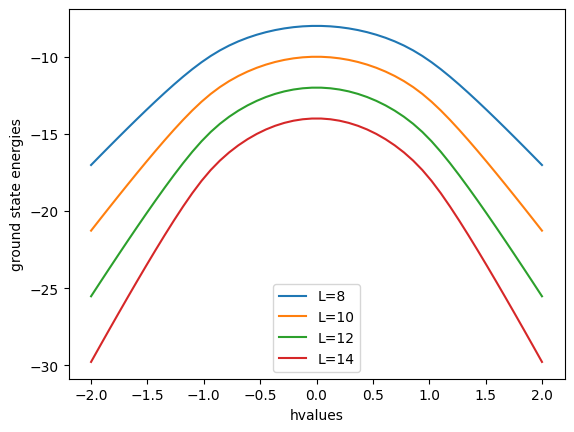

In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy

L_values = [8,10,12,14]
h_values = np.linspace(-2, 2)
ground_state_energies = {L: [] for L in L_values}

for L in L_values:
    for h in tqdm(h_values, desc=f'Computing for L={L}'):
        H = ising_sparse(L, h, periodic=True)
        ground_state = scipy.sparse.linalg.eigsh(H, k=1, which='SA', return_eigenvectors=False)[0]
        ground_state_energies[L].append(ground_state)

for L, energies in ground_state_energies.items():
    plt.plot(h_values, energies, label=f'L={L}')
plt.xlabel('hvalues')
plt.ylabel('ground state energies')
plt.legend()
plt.show()

Calculating for L=14:   7%|▋         | 1/15 [13:05<3:03:21, 785.81s/it]